Connecting to the graphical simulation interface by providing the .usd file of the simulated env.

In [1]:
import getpass
user = getpass.getuser()
from omni.isaac.kit import SimulationApp
# Set the path below to your desired nucleus server
simulation_app = SimulationApp({"livesync_usd": f'omniverse://localhost/Projects/trabelsi/jetbot.usd'})
print("Hi")

Passing the following args to the base kit application:  ['-f', '/home/student/.local/share/jupyter/runtime/kernel-bf284c0a-0fd4-478f-9fb1-740551c9be62.json']
[Warning] [omni.kit.app.plugin] No crash reporter present, dumps uploading isn't available.
[Info] [carb] Logging to file: /home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/logs/Kit/Isaac-Sim/2021.2/kit_20220502_232613.log
2022-05-02 21:26:13 s] [Warning] [omni.ext.plugin] [ext: omni.jetbot.opencv] Extensions config 'extension.toml' doesn't exist anywhere in '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/exts/omni.jetbot.opencv/**'
[0.045s] [ext: omni.kit.pipapi-0.0.0] startup
[0.054s] [ext: omni.kit.pip_archive-0.0.0] startup
[0.058s] [ext: omni.isaac.pip_archive-0.1.0] startup
[0.218s] [ext: omni.usd.config-1.0.0] startup
[0.220s] [ext: omni.usd.libs-1.0.0] startup
[0.362s] [ext: omni.stats-0.0.0] startup
[0.365s] [ext: omni.gpu_foundation-0.0.0] startup
[0.370s] [ext: omni.kit.async_engine-0.0.0] startup
[0.371s]

2022-05-02 21:26:13 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-02 21:26:13 s] [Error] [carb] Failed to startup plugin carb.windowing-glfw.plugin (interfaces: [carb::windowing::IGLContext v1.0],[carb::windowing::IWindowing v1.2]) (impl: carb.windowing-glfw.plugin)


[0.375s] [ext: omni.client-0.1.0] startup
[0.382s] [ext: omni.kit.renderer.core-0.0.0] startup

|---------------------------------------------------------------------------------------------|
| Driver Version: 470.103     | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|---------------------------------------------------------------------------------------------|
| 0   | NVIDIA GeForce RTX 3070          | Yes: 0 |     | 8438    MB | 10de      | 0          |
|     |                                  |        |     |            | 2488      | 68a19bb3.. |
|=============================================================================================|
| OS: Linux colima, Version: 5.4.0-105-generic
| Processor: 11th Gen Intel(R) Core(

2022-05-02 21:26:13 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-02 21:26:13 s] [Error] [carb] Failed to startup plugin carb.windowing-glfw.plugin (interfaces: [carb::windowing::IGLContext v1.0],[carb::windowing::IWindowing v1.2]) (impl: carb.windowing-glfw.plugin)
2022-05-02 21:26:13 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-02 21:26:13 s] [Error] [carb] Failed to startup plugin carb.windowing-glfw.plugin (interfaces: [carb::windowing::IGLContext v1.0],[carb::windowing::IWindowing v1.2]) (impl: carb.windowing-glfw.plugin)
2022-05-02 21:26:13 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-02 21:26:13 s] [Error] [carb] Failed to startup plugin carb.windowing-glfw.plugin (interfaces: [carb::windowing::IGLContext v1.0],[carb::windowing::IWindowing v1.2]) (impl: carb.windowing-glfw.plugin)
2022-05-02 21:26:13 s] [Error] [carb.windowing-glfw.plugin] GLFW initialization failed.
2022-05-02 21:26:13 s

[0.842s] [ext: omni.kit.test-0.0.0] startup
[0.922s] [ext: omni.ui-2.5.3] startup
[0.933s] [ext: omni.kit.mainwindow-0.0.0] startup
[0.935s] [ext: omni.kit.uiapp-0.0.0] startup
[0.936s] [ext: omni.usd.schema.physics-1.0.0] startup
2022-05-02 21:26:14 s] [Warning] [omni.ext.impl._internal] There is already a module 'pxr.UsdPhysics' in '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/extscore/omni.usd.schema.physics/pxr/UsdPhysics/__init__.py'. Can't import another module with the same name in public space from '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/extsPhysics/omni.usd.schema.physics'.
2022-05-02 21:26:14 s] [Warning] [omni.ext.impl._internal] There is already a module 'usd.schema.physics' in '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/extscore/omni.usd.schema.physics/usd/schema/physics/__init__.py'. Can't import another module with the same name in public space from '/home/student/.local/share/ov/pkg/isaac_sim-2021.2.1/kit/extsPhysics/omni.usd.

In [2]:
import carb
import omni.ext
import omni.appwindow
import gc
import numpy as np
from omni.isaac.jetbot import Jetbot
from omni.isaac.jetbot.controllers import DifferentialController
from omni.isaac.examples.base_sample import BaseSample
from omni.isaac.core.utils.viewports import set_camera_view

Create the scene:
    Add the jetbot
    Add a sphere object
    Declare a simple controller for the jetbot
    Setup the viewport to the jetbot camera

In [3]:
from omni.isaac.jetbot import Jetbot
from omni.isaac.core import World
from omni.isaac.core.objects import DynamicSphere
from omni.isaac.jetbot.controllers import DifferentialController
import numpy as np

my_world = World(stage_units_in_meters=0.01)
my_jetbot = my_world.scene.add(Jetbot(prim_path="/World/Jetbot", name="my_jetbot", position=np.array([0, 0.0, 2.0])))
my_sphere = my_world.scene.add(DynamicSphere(prim_path="/World/sphere", name="my_sphere", position=np.array([100,0,4.0])))
my_world.scene.add_default_ground_plane()
my_controller = DifferentialController(name="simple_control")
my_world.reset()
jetbot_camera_path = "/World/Jetbot/chassis/rgb_camera/jetbot_camera"
viewport = omni.kit.viewport.get_default_viewport_window()
viewport.set_active_camera(jetbot_camera_path)
i = 0

] startup
[3.114s] [ext: omni.isaac.motion_planning-0.1.7] startup
[3.120s] [ext: omni.isaac.kit-0.1.2] startup
[3.121s] [ext: omni.isaac.motion_generation-0.1.2] startup
[3.124s] [ext: omni.isaac.kaya-0.0.0] startup
[3.125s] [ext: omni.isaac.universal_robots-0.1.1] startup
[3.126s] [ext: omni.kit.window.file-1.3.5] startup
[3.228s] [ext: omni.kit.widget.settings-1.0.0] startup
[3.229s] [ext: omni.kit.widget.stage-2.6.8] startup
[3.232s] [ext: omni.kit.window.content_browser-2.4.10] startup
[3.342s] [ext: omni.kit.window.preferences-1.1.5] startup
[3.369s] [ext: omni.kit.usd_undo-0.1.0] startup
[3.371s] [ext: omni.kit.widget.stage_icons-1.0.2] startup
[3.372s] [ext: omni.kit.property.usd-3.11.4] startup
[3.395s] [ext: omni.debugdraw-0.1.0] startup
[3.399s] [ext: omni.physx.commands-1.3.14-5.1] startup
[3.406s] [ext: omni.kit.window.stage-2.3.4] startup
[3.412s] [ext: omni.physx.ui-1.3.14-5.1] startup
[3.428s] [ext: omni.kit.property.material-1.7.2] startup
[3.434s] [ext: omni.kit.windo

In [13]:
# i = 0
# while simulation_app.is_running() and i<400:
#     my_world.step(render=True)
#     if my_world.is_playing():
#         if my_world.current_time_step_index == 0:
#             my_world.reset()
#             my_controller.reset()
#         if i >= 0 and i < 1000:
#             # forward
#             my_jetbot.apply_wheel_actions(my_controller.forward(command=[5, 0]))
#             print(my_jetbot.get_linear_velocity())
#         elif i >= 1000 and i < 1300:
#             # rotate
#             my_jetbot.apply_wheel_actions(my_controller.forward(command=[0.0, np.pi / 12]))
#             print(my_jetbot.get_angular_velocity())
#         elif i >= 1300 and i < 2000:
#             # forward
#             my_jetbot.apply_wheel_actions(my_controller.forward(command=[5, 0]))
#         elif i == 2000:
#             i = 0
#         i += 1

(0,0,0)
(5.56277,-0.00623195,-0.00805265)
(5.61765,-0.0112657,-0.000261838)
(5.6182,-0.0166165,-0.000862178)
(5.62229,-0.0126467,-0.000484598)
(5.62142,-0.0142944,-0.000725242)
(5.6192,-0.0147479,-0.00117199)
(5.62219,-0.0171814,-0.000623184)
(5.61809,-0.0130992,-0.000344903)
(5.62145,-0.0150966,-0.000699304)
(5.62263,-0.0164244,-0.00192916)
(5.62239,-0.017458,-0.000681763)
(5.62196,-0.0162567,-0.000798586)
(5.62246,-0.0182709,-0.00074282)
(5.61908,-0.0172397,-0.00155684)
(5.62235,-0.018436,-0.000857639)
(5.62187,-0.0156842,-0.00120309)
(5.61873,-0.0198652,-0.000989985)
(5.61859,-0.0174093,-0.00127551)
(5.62207,-0.0186264,-0.00162956)
(5.62217,-0.0181859,-0.00131276)
(5.61829,-0.0186179,-0.00197531)
(5.61842,-0.0181658,-0.00140371)
(5.61819,-0.0191227,-0.00113373)
(5.61922,-0.0189441,-0.00112623)
(5.61795,-0.0194727,-0.00181205)
(5.6193,-0.0193785,-0.00158633)
(5.62178,-0.0194833,-0.00142277)
(5.61912,-0.0193937,-0.00121789)
(5.62166,-0.020294,-0.00163844)
(5.61878,-0.0201881,-0.002251

(5.61783,-0.102011,-0.00262861)
(5.6226,-0.0983133,-0.00370381)
(5.61695,-0.0988525,-0.00211792)
(5.61788,-0.0999366,-0.00322915)
(5.62015,-0.0997879,-0.00214529)
(5.62154,-0.100047,-0.00207214)
(5.61645,-0.0993908,-0.0023271)
(5.61739,-0.100362,-0.00251775)
(5.61607,-0.103231,-0.00292883)
(5.62135,-0.101113,-0.00206095)
(5.61612,-0.100919,-0.00214349)
(5.61745,-0.1011,-0.00223541)
(5.61625,-0.100774,-0.00273172)
(5.61995,-0.102678,-0.00250859)
(5.61992,-0.102652,-0.00203991)
(5.61684,-0.102813,-0.00271108)
(5.61555,-0.102851,-0.00258763)
(5.61773,-0.101547,-0.00343438)
(5.6155,-0.104181,-0.0022792)
(5.61769,-0.102597,-0.00390757)
(5.61598,-0.105486,-0.00278394)
(5.61993,-0.103489,-0.00199103)
(5.61523,-0.10618,-0.00301382)
(5.61982,-0.104961,-0.00276189)
(5.61524,-0.107857,-0.00210596)
(5.61513,-0.106723,-0.00271599)
(5.61541,-0.109344,-0.00278601)
(5.615,-0.105275,-0.00239388)
(5.61494,-0.107073,-0.00221838)
(5.61525,-0.106968,-0.00210468)
(5.61478,-0.106389,-0.00220862)
(5.61608,-0.

There are useful information, but below there is a better implementation with obj detection

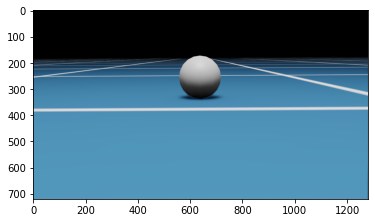

In [31]:
import carb
import omni.kit
import numpy as np
import asyncio
import omni.syntheticdata._syntheticdata as gt
from omni.isaac.synthetic_utils import SyntheticDataHelper
from PIL import Image
my_world.reset()
from IPython.display import clear_output
import matplotlib.pyplot as plt

# stage = omni.usd.get_context().get_stage()
# settings_interface = carb.settings.acquire_settings_interface()
# viewport_interface = omni.kit.viewport.get_viewport_interface()

# sd_helper = SyntheticDataHelper()

# print(str(stage))
# print(str(settings_interface))
# print(str(viewport_interface))

# viewport_handle = viewport_interface.get_instance('Viewport')
# viewport_window = viewport_interface.get_viewport_window(viewport_handle)
# jetbot_camera_path = "/World/Jetbot/chassis/rgb_camera/jetbot_camera"
# viewport_window.set_active_camera(jetbot_camera_path)

i=0
%matplotlib inline
while simulation_app.is_running() and i<10:
    my_world.step(render=True)
    clear_output(wait=True)
    if my_world.is_playing():
        gt = sd_helper.get_groundtruth(["rgb"], viewport_window)
        if my_world.current_time_step_index == 0:
            my_world.reset()
            my_controller.reset()
        if i >= 0 and i < 1000:
            # forward
            my_jetbot.apply_wheel_actions(my_controller.forward(command=[10, 0]))
            #print(my_jetbot.get_linear_velocity())
        elif i >= 1000 and i < 1300:
            # rotate
            my_jetbot.apply_wheel_actions(my_controller.forward(command=[0.0, np.pi / 12]))
            print(my_jetbot.get_angular_velocity())
        elif i >= 1300 and i < 2000:
            # forward
            my_jetbot.apply_wheel_actions(my_controller.forward(command=[5, 0]))
        elif i == 2000:
            i = 0
        i += 1
        plt.imshow(gt["rgb"])
        plt.show()
    
    



The scripts is a converted version of the algorithm implemented in C++ previously. It setups the active camera to jetbot's cam. It reads the configuration and weight files required for the DNN. It reads the image directly from the camera's viewport and converts it to blob to forward it in the network. Finally, if the confidence is higher than the threshold setup, it draws the rectangular and inserts a label next to the detected object. The image is plotted.

Image input size: 720, 1280
Id: 4
sphere1: 91.43%


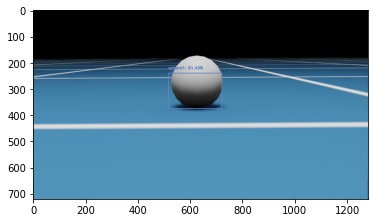

In [128]:
import cv2
from omni.isaac.synthetic_utils import SyntheticDataHelper
import omni.syntheticdata._syntheticdata as gt
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PIL import Image
import asyncio
CLASSES = ["cone",
"cylinder",
"cuboid",
"sphere1"]

COLORS = np.random.uniform(0,255,size=(len(CLASSES),3))

stage = omni.usd.get_context().get_stage()
# settings_interface = carb.settings.acquire_settings_interface()
viewport_interface = omni.kit.viewport.get_viewport_interface()

sd_helper = SyntheticDataHelper()

# print(str(stage))
# print(str(settings_interface))
# print(str(viewport_interface))

viewport_handle = viewport_interface.get_instance('Viewport')
viewport_window = viewport_interface.get_viewport_window(viewport_handle)
jetbot_camera_path = "/World/Jetbot/chassis/rgb_camera/jetbot_camera"
viewport_window.set_active_camera(jetbot_camera_path)

net = cv2.dnn.readNetFromTensorflow('data/graphs/frozen_inference_graph.pb', 'data/graphs/graph.pbtxt')
i=0
while simulation_app.is_running() and i<20:
    my_world.step(render=True)
    if my_world.is_playing():
        clear_output(wait=True)
        gt = sd_helper.get_groundtruth(["rgb"], viewport_window)
        input_image = cv2.cvtColor(gt["rgb"], cv2.COLOR_RGBA2RGB)
        (h,w) = input_image.shape[:2]
        print("Image input size: " + str(h) + ", " + str(w))
        blob = cv2.dnn.blobFromImage(image=cv2.resize(input_image,(w,h)), scalefactor=1.0, size=(300,300), swapRB=True)

        net.setInput(blob)
        detections = net.forward()
        for j in np.arange(0, detections.shape[2]):
            confidence = detections[0,0,j,2]
            if confidence > 0.70:
                idx = int(detections[0,0,j,1])
                box = detections[0,0,j,3:7] * np.array([w,h,w,h])
                (startX, startY, endX, endY) = box.astype("int")
                print("Id: " + str(idx))
                label = "{}: {:.2f}%".format(CLASSES[idx-1], confidence*100)
                print(label)
                cv2.rectangle(input_image, (startX,startY), (endX,endY), COLORS[idx-1],2)
                y = startY - 15 if startY - 15 > 15 else startY + 15
                cv2.putText(input_image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[idx-1],2)
                #plt.imshow(gt["rgb"])
                plt.imshow(input_image)
                plt.show()
        if my_world.current_time_step_index == 0:
            my_world.reset()
            my_controller.reset()
        if i >= 0 and i < 1000:
            # forward
            my_jetbot.apply_wheel_actions(my_controller.forward(command=[10, 0]))
        i+=1

In [126]:
my_world.reset()

In [6]:
simulation_app.close()

Simulation App Shutting Down
ture will be created as a regular resource.
[140.816s] [ext: omni.isaac.sim.python-2021.2.1] shutdown
[140.816s] [ext: omni.physx.bundle-1.3.14-5.1] shutdown
[140.816s] [ext: omni.physx.vehicle-1.3.14-5.1] shutdown
[140.836s] [ext: omni.kit.property.physx-0.1.0] shutdown
[140.849s] [ext: omni.physx.cct-1.3.14-5.1] shutdown
[140.861s] [ext: omni.physx.demos-1.3.14-5.1] shutdown
[140.872s] [ext: omni.physx.tests-1.3.14-5.1] shutdown
[140.883s] [ext: omni.physx.ui-1.3.14-5.1] shutdown
[140.897s] [ext: omni.physx.commands-1.3.14-5.1] shutdown
[140.908s] [ext: omni.isaac.contact_sensor-0.1.0] shutdown
[140.945s] [ext: omni.isaac.dofbot-0.1.1] shutdown
[140.945s] [ext: omni.isaac.franka-0.0.0] shutdown
[140.945s] [ext: omni.isaac.dr-0.1.8] shutdown
[140.952s] [ext: omni.isaac.jetbot-0.0.0] shutdown
[140.952s] [ext: omni.isaac.kaya-0.0.0] shutdown
[140.952s] [ext: omni.isaac.universal_robots-0.1.1] shutdown
[140.952s] [ext: omni.isaac.motion_generation-0.1.2] shut